In [9]:
import pandas as pd
import numpy as np
import nltk 
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
df=pd.read_csv ('clean.csv')
df.tail(12)

,Unnamed: 0,label,judul,Unnamed: 0.1,stop
4506,387,0,klarifikasi terkait perbedaan hasil situng kpu...,387.0,klarifikasi kait beda hasil situng kpu pindah ...
4507,388,0,pks gerindra purwakarta bantah pasang spanduk ...,388.0,pks gerindra purwakarta bantah pasang spanduk ...
4508,389,0,universitas muhammadiyah kupang bantah mengini...,389.0,universitas muhammadiyah kupang bantah mengini...
4509,390,0,klarifikasi isu ott bupati kapuas kpk,390.0,klarifikasi isu ott bupati kapuas kpk
4510,391,0,kronologis polisi berondong sedan terobos razi...,391.0,kronologis polisi berondong sedan terobos razi...
4511,392,0,dituding tawarkan pekerjaan peretas situs kpu ...,392.0,tuding tawar kerja retas situs kpu polri bantah
4512,393,0,terduga teroris is tertangkap sleman yogyakart...,393.0,duga teroris is tangkap sleman yogyakarta lati...
4513,394,0,klarifikasi polres bogor terkait pembuatan sim...,394.0,klarifikasi polres bogor kait buat sim tes rp ...
4514,395,0,ketua inasgoc bantah indonesia bermain curang ...,395.0,ketua inasgoc bantah indonesia main curang cab...
4515,396,0,klarifikasi sholat ibadah agama darurat,396.0,klarifikasi sholat ibadah agama darurat


Proporsi label


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


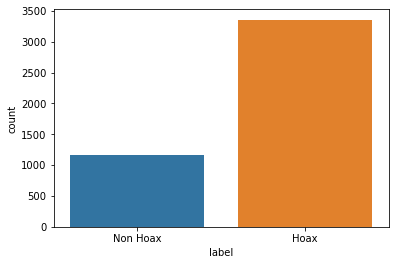

In [11]:
print("Proporsi label")
ax = sns.countplot(df['label'])
ax.set_xticklabels(['Non Hoax','Hoax'])
plt.show()

In [12]:
df['label'].value_counts()

1    3356
0    1162
Name: label, dtype: int64

# Resampling


In [14]:
# class count
class_count_0, class_count_1 = df['label'].value_counts()

# Separate class
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1162, 5)
class 1: (3356, 5)


# Random under sampling


total class of 1 and0: 1    3356
0    1162
Name: label, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

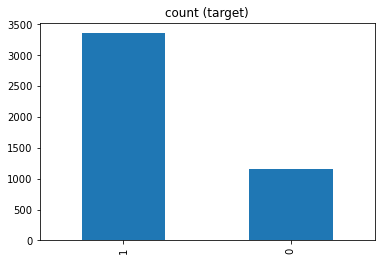

In [17]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['label'].value_counts())# plot the count after under-sampeling
test_under['label'].value_counts().plot(kind='bar', title='count (target)')

# Random Over sampling


total class of 1 and 0: 1    3356
0    1162
Name: label, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

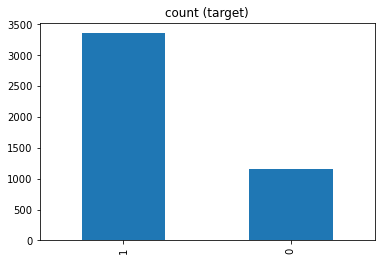

In [18]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['label'].value_counts())# plot the count after under-sampeling
test_over['label'].value_counts().plot(kind='bar', title='count (target)')

In [39]:
!pip install xgboost

In [21]:
import imblearn

# Random under-sampling with imblearn

In [29]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [31]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1, 2))

listdata=df['stop'].values.astype('object')
listdata = [d for d in listdata]

listdata
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
tfidf = v.fit_transform(df['stop'].values.astype('U'))
y = df.iloc[:, 2].values
print(tfidf.shape, len(y))

(4518, 6836) 4518


In [32]:
from sklearn.model_selection import train_test_split
seed = 1
X = df['stop'].values.astype('U')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train = vectorizer.fit_transform(X_train) # "Fit_Transform"
X_test = vectorizer.transform(X_test) # Perhatikan disini hanya "Transform"

print(X_train.shape, X_test.shape)

(3162, 1102) (1356, 1102)


array([['pakai masker sebab sakit legionnaires',
        'foto jim rohn jokowi presiden baik sejarah bangsa indonesia',
        'politik nyata jokowi hasil pulang triliun uang negara swiss',
        ..., 'klarifikasi sholat ibadah agama darurat',
        'polisi klarifikasi bom pasuruan',
        'ormas projo bantah keluar surat aksi kiri super senyap']],
      dtype='<U149')

In [48]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X.reshape(1, -1), y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

ValueError: Found input variables with inconsistent numbers of samples: [1, 4518]